In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import IsolationForest

# Problem Proposal:
- The technology is here to make lives easier and more convenient. Listening to music, watching movies and other activities became really popular over the last century. Nowadays it is hard to know what to watch or listen to with the applications like youtube, spotify since there are so many songs available in every kind. However, using data science techniques and algorithms, we can create suggestions about what the user might like depending on what they previously listened to, or liked. 


# Loading Data

In [2]:
df=pd.read_csv('data/spotify_song_data.csv', encoding='UTF-8')
print(df.columns)
print(df.shape) 
df.head()

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')
(170653, 19)


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


# Exploratory Analysis

In [3]:
# analyze various metrics across multiple features
features = ['valence', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo']

# averages and stds
print("AVERAGES AND STANDARD DEVIATIONS")
print("--------------------------------")
averages = []
stds = []
for feature in features:
    averages.append(np.mean(list(df[feature])))
    stds.append(np.std(list(df[feature])))
    print(feature, "--- avg:", averages[-1], "std:", stds[-1]) 

AVERAGES AND STANDARD DEVIATIONS
--------------------------------
valence --- avg: 0.5285872111424939 std: 0.26317069291669615
acousticness --- avg: 0.5021147637067032 std: 0.3760306234167591
danceability --- avg: 0.5373955347986852 std: 0.17613721955546152
duration_ms --- avg: 230948.3106655025 std: 126118.04515039867
energy --- avg: 0.4823888351127728 std: 0.26764492039084176
explicit --- avg: 0.08457513199299163 std: 0.2782484124687141
instrumentalness --- avg: 0.16700958082940237 std: 0.31347375541926153
key --- avg: 5.199844128143074 std: 3.5150836071706766
liveness --- avg: 0.20583865545873795 std: 0.17480414909425995
loudness --- avg: -11.467990038264784 std: 5.697926217815683
mode --- avg: 0.7069023105365859 std: 0.45518285764582805
popularity --- avg: 31.431794342906365 std: 21.826551188905174
speechiness --- avg: 0.09839326235108671 std: 0.1627395956549461
tempo --- avg: 116.86158961752797 std: 30.708443066691036


In [4]:
# count number of unique artists 
artists = list(df['artists'])
print("Number of Unique Artists:", len(set(artists)))
print("There are", len(artists), "songs so on average each artist has", round(len(artists)/len(set(artists)), 2),
      "songs in the dataset")

# count number of explicit songs
explicit = list(df['explicit'])
print("There are", explicit.count(1), "explicit songs in the dataset,", 
      round(explicit.count(1)/len(explicit), 2)*100, "percent of songs are explicit")

Number of Unique Artists: 34088
There are 170653 songs so on average each artist has 5.01 songs in the dataset
There are 14433 explicit songs in the dataset, 8.0 percent of songs are explicit


There are 27892 songs rated with 0 popularity, 16.0 percent of songs have 0 popularity


/usr/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Popularity')

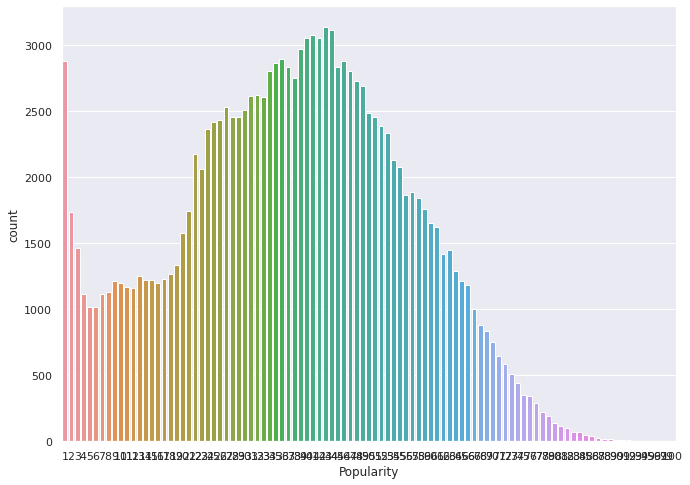

In [5]:
# count song popularity
popularity = list(df["popularity"])
popularity = list(np.sort(popularity))
print("There are", popularity.count(0), "songs rated with 0 popularity,",
      round(popularity.count(0)/len(popularity),2)*100, "percent of songs have 0 popularity")
try:
    while True:
        popularity.remove(0) # remove 0s for better visualization - will analyze 0s later
except ValueError:
    pass

sns.set(rc={'figure.figsize':(11, 8)})
p = sns.countplot(popularity)
p.set_xlabel("Popularity")

/usr/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

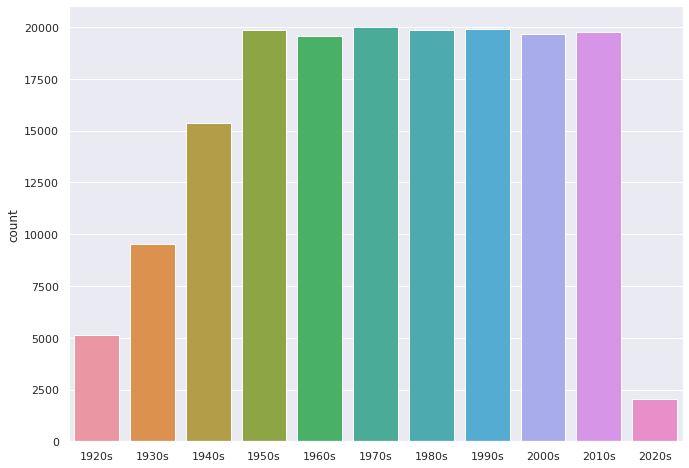

In [6]:
# count number of songs from different decades
years = list(df["year"])
for index, year in enumerate(years):
    years[index] = str(int(year/10) * 10) + 's'

decade = years.copy()
df["decade"] = decade

sns.set(rc={'figure.figsize':(11, 8)})
sns.countplot(decade)

In [7]:
# analyze songs with 0 popularity
zero_df = df[df['popularity'] == 0]
# averages and stds
print("PERCENT DIFFERENCES BETWEEN POPULARITY 0 AND WHOLE DATASET")
print("--------------------------------")
averages_0 = []
std_0 = []
# compare averages with entire dataset averages
for index, feature in enumerate(features):
    averages_0.append(np.mean(list(zero_df[feature])))
    std_0.append(np.std(list(zero_df[feature])))
    val = round(((averages_0[index]-averages[index])/averages[index])*100, 2)
    print(feature, "difference with dataset:", str(val) + "%")

PERCENT DIFFERENCES BETWEEN POPULARITY 0 AND WHOLE DATASET
--------------------------------
valence difference with dataset: -3.33%
acousticness difference with dataset: 69.32%
danceability difference with dataset: -6.32%
duration_ms difference with dataset: -7.16%
energy difference with dataset: -43.68%
explicit difference with dataset: 4.11%
instrumentalness difference with dataset: 108.27%
key difference with dataset: 0.01%
liveness difference with dataset: 8.48%
loudness difference with dataset: 32.3%
mode difference with dataset: -1.57%
popularity difference with dataset: -100.0%
speechiness difference with dataset: 95.17%
tempo difference with dataset: -6.98%


Compared to the entire dataset the songs with 0 popularity have a much higher averages for acousticness, instrumentalness, and speechiness. Additionally, they have a much lower average for energy.

Text(0.5, 1.0, 'Average Rating per Decade')

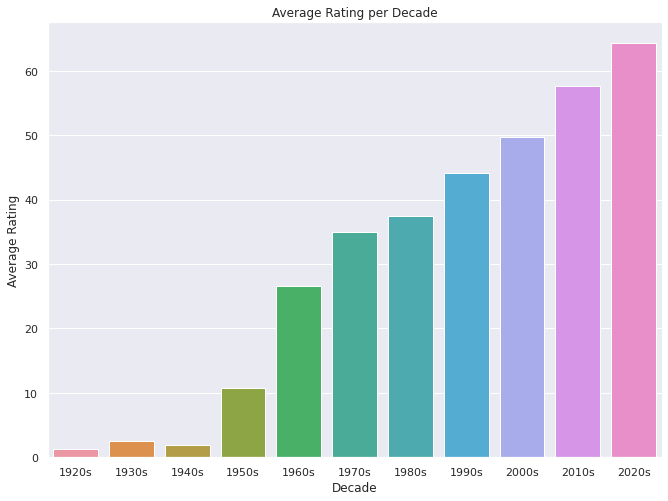

In [8]:
# analyze song popularity across the decades
decades = df["decade"]
popularity = df["popularity"]
decade_dict = {data: [] for data in set(decades)}

for index, decade in enumerate(decades):
    decade_dict[decade].append(popularity[index])

avg_dict = {data: np.mean(decade_dict[data]) for data in decade_dict}
avg_dict = dict(sorted(avg_dict.items()))

p = sns.barplot(x=list(avg_dict.keys()),y=list(avg_dict.values()))
p.set_xlabel("Decade")
p.set_ylabel("Average Rating")
p.set_title("Average Rating per Decade")

## Future Work and Above Data Analysis
- The future work will include the implementetion of K-nn's with nearest-neighbor algorithm. By implementing that we are aming to recomend people the type of music they might like. The work above is a overall analysis of the data from the 'spotify_song_data.csv'. This preliminary evaluation of the data will helps us what to predict or will give us a foundation to sanity check with what we recommend to people after k-nn nearest-neighbor implementation.  

    Sum the popularity rating of the songs and sum the ones that are the same song. 

In [9]:
df_popularity_sum=df.copy(deep=True)
df_popularity_sum=df_popularity_sum.groupby('name').sum() #sum all the colums 
df_popularity_sum.sort_values(by=['popularity'],inplace=True,ascending=False) #sort them by the popularity rating
df_popularity_sum=df_popularity_sum.reset_index() #reset the index
df_popularity_sum.head(50) # list the first 10 highest popular song

,name,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,White Christmas,21.7427,143555,56.760400,26.6128,13098179,17.568600,0,14.586716,355,13.3924,-1064.831,71,1982,2.5293,7061.072
1,Winter Wonderland,32.9057,124202,45.102740,35.2050,10134847,24.229700,0,11.473766,303,10.9913,-755.286,53,1943,2.5278,7256.427
2,Home,15.9344,80050,16.361304,20.6630,9452695,21.215200,1,4.083545,213,7.4524,-380.438,31,1913,1.9210,4590.149
3,Summertime,25.2126,110170,36.081972,27.7440,13327708,20.070500,0,11.072772,299,9.2448,-759.811,15,1672,2.6186,6407.001
4,Stay,17.2500,65926,12.515893,18.7180,7232483,19.264000,2,0.579372,188,5.3375,-284.449,24,1625,1.6276,3689.369
5,You,17.5550,65920,9.357364,16.9720,8301200,20.500300,6,2.315303,194,4.6165,-276.121,16,1580,2.5511,4419.349
6,Runaway,17.7576,61978,5.552782,17.9190,7453267,21.504000,4,1.419711,193,7.4717,-213.379,21,1519,1.9214,4006.790
7,Forever,12.0400,61898,11.768916,16.8840,7144168,17.263000,9,3.323067,159,6.0221,-273.725,21,1514,3.2069,3891.621
8,Hold On,14.9770,61885,7.889463,17.4410,7610499,18.148000,1,1.915811,134,4.6094,-274.343,22,1474,1.6213,3862.881
9,Silent Night,7.3096,88868,39.698400,11.9443,8483747,8.342300,0,8.217691,204,6.1481,-718.520,45,1432,1.5421,4504.884


In [10]:
#normalize the data since the column attributes have different sclases
df_pop_num_norm=df_popularity_sum.select_dtypes(include=np.number)
df_pop_num_norm=(df_pop_num_norm - df_pop_num_norm.min()) / (df_pop_num_norm.max() - df_pop_num_norm.min())
df_pop_num_norm.head(10)

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,0.520700,1.000000,1.000000,0.755938,0.907381,0.671480,0.000000,0.465934,1.000000,1.000000,0.000000,1.000000,1.000000,0.444548,0.973078
1,0.788034,0.863359,0.794616,1.000000,0.701944,0.926070,0.000000,0.366499,0.853521,0.820712,0.289650,0.746479,0.980323,0.444284,1.000000
2,0.381601,0.551626,0.288252,0.586934,0.654652,0.810855,0.076923,0.130438,0.600000,0.556465,0.640406,0.436620,0.965187,0.337634,0.632563
3,0.603798,0.764287,0.635689,0.788070,0.923294,0.767104,0.000000,0.353690,0.842254,0.690302,0.285416,0.211268,0.843592,0.460243,0.882942
4,0.413107,0.451904,0.220504,0.531686,0.500733,0.736279,0.153846,0.018507,0.529577,0.398547,0.730226,0.338028,0.819879,0.286066,0.508428
5,0.420412,0.451862,0.164857,0.482091,0.574823,0.783531,0.461538,0.073956,0.546479,0.344710,0.738018,0.225352,0.797175,0.448379,0.609025
6,0.425263,0.424030,0.097828,0.508990,0.516039,0.821893,0.307692,0.045349,0.543662,0.557906,0.796728,0.295775,0.766398,0.337704,0.552171
7,0.288337,0.423465,0.207344,0.479591,0.494610,0.659800,0.692308,0.106147,0.447887,0.449665,0.740260,0.295775,0.763875,0.563642,0.536300
8,0.358673,0.423373,0.138996,0.495413,0.526939,0.693625,0.076923,0.061196,0.377465,0.344180,0.739682,0.309859,0.743693,0.284959,0.532339
9,0.175052,0.613885,0.699403,0.339279,0.587478,0.318847,0.000000,0.262492,0.574648,0.459074,0.324053,0.633803,0.722503,0.271038,0.620813


    The knn will be using the popularity score to make predictions

In [11]:
def dist(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [12]:
def knn(song,k,used_params):
    
    #get the songs as a list
    songs_list=df_popularity_sum['name'].to_list()
    
    #check if the song is in the list
    if(song not in songs_list):
        return("The song doesn't exist")
    else:
        #get the index of the song
        song_idx=songs_list.index(song)
        #get the popularity score
        #print(used_params)
        popularity=np.array(list(df_pop_num_norm[used_params].iloc[song_idx]))
#         print(popularity)
        
#         popularity=df_popularity_sum['popularity'].iloc[song_idx]
        #define the disntance list
        distances=[]
        
        for i in range(len(songs_list)):
            
            #if it itteration same as the song given pass
            if i!=song_idx:        
            #find the distance
                euc_dist=dist(popularity,np.array(list(df_pop_num_norm[used_params].iloc[i])))
                distances.append([euc_dist,df_popularity_sum['name'][i]])
            
            
        distances=sorted(distances)
        
        print("Top "+str(k)+" songs recommended for "+song+" are:.....\n")
        for i in range(k):
            print(str(i+1)+'. '+distances[i][1])
    

In [13]:
popularity=list(df_popularity_sum[['popularity','valence']].iloc[2])
print(popularity)

[1913.0, 15.9344]


In [16]:
params=['popularity']
knn('White Christmas',10,params)

Top 10songs recommended for White Christmas are:.....

1. Winter Wonderland
2. Home
3. Summertime
4. Stay
5. You
6. Runaway
7. Forever
8. Hold On
9. Silent Night
10. Jingle Bells


In [17]:
knn('White Christmas',10,['popularity','valence','acousticness','energy','liveness','danceability',
                  'instrumentalness','loudness','speechiness','tempo'])

Top 10songs recommended for White Christmas are:.....

1. Winter Wonderland
2. Summertime
3. Jingle Bells
4. Silent Night
5. Home
6. Sleigh Ride
7. Overture
8. Silver Bells
9. The Christmas Song
10. Autumn Leaves
